# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [2]:
# Your code here - load the dataset
import numpy as np  
import pandas as pd  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.model_selection import train_test_split

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [3]:
# Your code here
df = pd.read_csv('ames.csv', index_col = 0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [4]:
# Your code here - drop columns with missing data
df.dropna(axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous numeric predictor
A variable that can take any numeric value within a range, including decimals.
### Discrete numeric predictor
A numeric variable that only takes specific whole number values, often counts.
### String categorical predictor
A variable made up of text labels (strings) that represent different categories.
### Discrete categorical predictor
A categorical variable (like string categories), but with a limited number of distinct, countable categories.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [6]:
correlations = df.corr()["SalePrice"].sort_values(ascending=False)
print(correlations)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


### Continuous Numeric Predictor

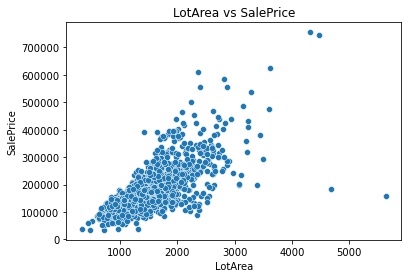

In [7]:
# Your code here - continuous numeric predictor
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot of GrLivArea vs SalePrice
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

### Discrete Numeric Predictor

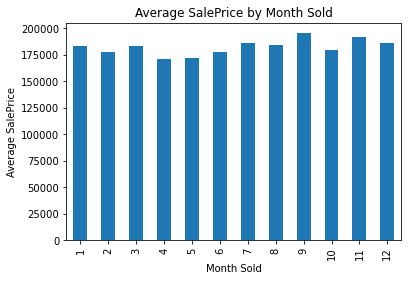

In [8]:
# Your code here - discrete numeric predictor
month_avg = df.groupby('MoSold')['SalePrice'].mean()

# Plot
month_avg.plot(kind='bar')
plt.title('Average SalePrice by Month Sold')
plt.xlabel('Month Sold')
plt.ylabel('Average SalePrice')
plt.show()

### String Categorical Predictor

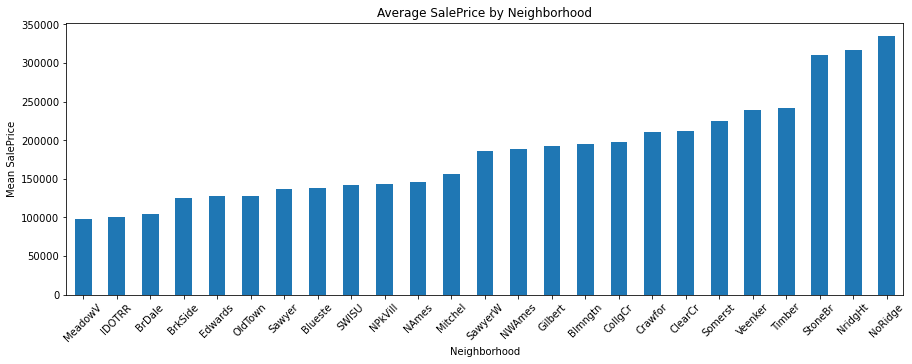

In [9]:
# Your code here - string categorical predictor
# Calculate average sale price by neighborhood
neighborhood_means = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()

# Plot
neighborhood_means.plot(kind='bar', figsize=(15,5))
plt.title('Average SalePrice by Neighborhood')
plt.ylabel('Mean SalePrice')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

### Discrete Categorical Predictor

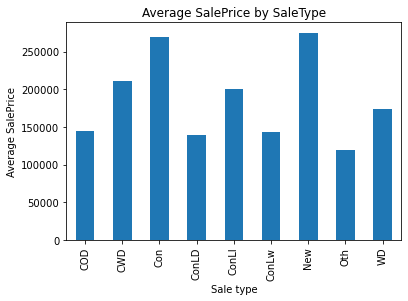

In [10]:
# Your code here - discrete categorical predictor
month_avg = df.groupby('SaleType')['SalePrice'].mean()

# Plot
month_avg.plot(kind='bar')
plt.title('Average SalePrice by SaleType')
plt.xlabel('Sale type')
plt.ylabel('Average SalePrice')
plt.show()

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [11]:
# Your code here - prepare X and y, including one-hot encoding
# Select predictors and target
X = df[['GrLivArea', 'MoSold', 'SaleType', 'GarageArea','OverallQual','TotalBsmtSF', 'YearBuilt']]
y = df['SalePrice']

# One-hot encode SaleType (drop_first avoids dummy variable trap)
X = pd.get_dummies(X, columns=['SaleType'], drop_first=True)

# Check resulting dataframe
X.head()

,GrLivArea,MoSold,GarageArea,OverallQual,TotalBsmtSF,YearBuilt,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,
1,1710,2,548,7,856,2003,0,0,0,0,0,0,0,1
2,1262,5,460,6,1262,1976,0,0,0,0,0,0,0,1
3,1786,9,608,7,920,2001,0,0,0,0,0,0,0,1
4,1717,2,642,7,756,1915,0,0,0,0,0,0,0,1
5,2198,12,836,8,1145,2000,0,0,0,0,0,0,0,1


In [12]:
# Your answer here - which category or categories were dropped?
# The first category in alphabetical order is dropped to prevent multicollinearity.
df['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [13]:
# Your code here - build a regression model and display results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Build and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Metrics
print('R^2 Score:', r2_score(y_test, y_pred))

R^2 Score: 0.8003850154463628


## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

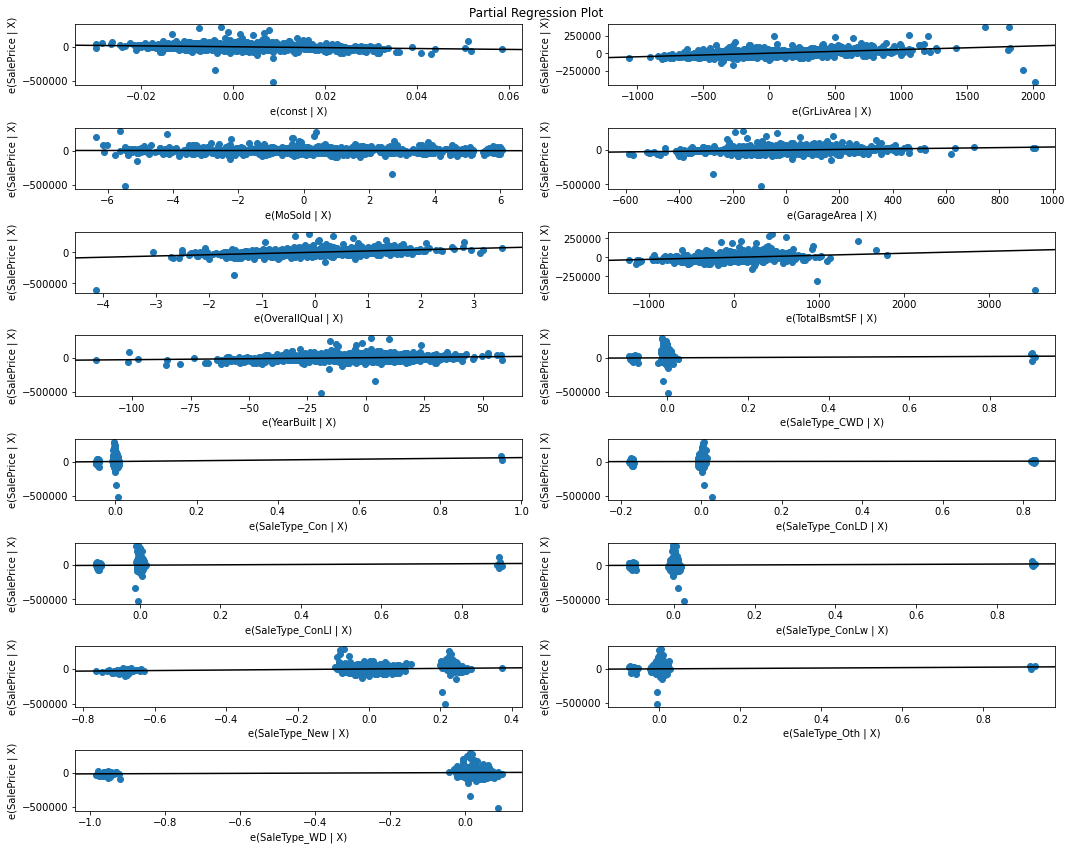

In [14]:
# Your code here - create partial regression plots
import statsmodels.api as sm
# Add a constant to the model (required by statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using OLS
model_sm = sm.OLS(y, X_with_const).fit()

# Create partial regression plots
fig = plt.figure(figsize=(15, 12))
sm.graphics.plot_partregress_grid(model_sm, fig=fig)
plt.tight_layout()
plt.show()


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [15]:
# Your code here - calculate an error-based metric
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 24018.28919178872
MSE: 1398364658.2761688
RMSE: 37394.71430932678


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [16]:
# Your answer here
#R-Squared Score:
#The R^2 score for the model is approximately 0.8004, which suggests that around 80% of the variance in house prices can be explained by the predictors used in the model. This is a good fit for a model predicting house prices, but there is still room for improvement since 20% of the variance is unexplained.

#Error-Based Metrics:
"""
Mean Absolute Error (MAE): The MAE is approximately 24,018, indicating that on average, the model's predictions deviate from the actual prices by around $24,018.

Mean Squared Error (MSE): The MSE value of approximately 1.4 billion signifies the average squared error, which is sensitive to large deviations. This highlights the potential impact of outliers on the model's performance.

Root Mean Squared Error (RMSE): The RMSE of approximately 37,394 gives an indication of the magnitude of prediction errors in the same units as the target variable (house price), which is a useful measure for understanding the scale of prediction errors.
"""

"\nMean Absolute Error (MAE): The MAE is approximately 24,018, indicating that on average, the model's predictions deviate from the actual prices by around $24,018.\n\nMean Squared Error (MSE): The MSE value of approximately 1.4 billion signifies the average squared error, which is sensitive to large deviations. This highlights the potential impact of outliers on the model's performance.\n\nRoot Mean Squared Error (RMSE): The RMSE of approximately 37,394 gives an indication of the magnitude of prediction errors in the same units as the target variable (house price), which is a useful measure for understanding the scale of prediction errors.\n"

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the data
X = df[['GrLivArea', 'MoSold', 'SaleType', 'GarageArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']]
y = df['SalePrice']

# One-hot encode the 'SaleType' categorical column
X = pd.get_dummies(X, columns=['SaleType'], drop_first=True)

# Step 2: Standardize the features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Fit the model using scikit-learn LinearRegression
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred_sk = model_sk.predict(X_test)

# Step 6: Metrics
print('R^2 Score (sklearn):', r2_score(y_test, y_pred_sk))
print('MAE (sklearn):', mean_absolute_error(y_test, y_pred_sk))
print('MSE (sklearn):', mean_squared_error(y_test, y_pred_sk))
print('RMSE (sklearn):', np.sqrt(mean_squared_error(y_test, y_pred_sk)))


R^2 Score (sklearn): 0.7982628081609225
MAE (sklearn): 24666.67305065244
MSE (sklearn): 1547390069.5276127
RMSE (sklearn): 39336.87925506563


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.